# pCT-Proton-3-ALPIDE-CHIPS sync tag problem by Harsh-Bhushan Mukhiya and Markus Lutz

## Overview about the project

* Project plan
* Data Analysis
* Approach 1: KDTree nearest neighbor
* Approach 2: DBScan
* Conclusion

### Project Plan

We are working with the pCT-Proton-3-ALPIDE-Chips dataset and we try to tackle the sync tag problem. As you can see below the dataset consists of five columns:
1. id_plane which shows on which chip the porton hit
2. id_x which shows where on the x axis the proton hit
3. id_y which shows where on the y axis the proton hit
4. i_event which shows which protons are shot out in one event (faulty counter errors)
5. i_time_stamp which shows when the protons hit the chip

In the following project we will try to find out which event ids belong together.

### Data Analysis

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial
import seaborn as sn
from project_Mukhiya_inf3692_SS21.src.features import split_data
from project_Mukhiya_inf3692_SS21.src.features import split_by_time


df = pd.read_csv("./data/pctdata.csv")

df.head()

id_plane   id_x   id_y  i_event  i_time_stamp
0         1  492.0  310.0       32         21600
1         1  493.0  310.0       32         21600
2         1  493.0  311.0       32         21600
3         1  492.0  311.0       32         21600
4         1  493.0  312.0       32         21600

In [16]:
df.describe()

id_plane           id_x           id_y        i_event  \
count  220138.000000  220138.000000  220138.000000  220138.000000   
mean        0.977087     542.052535     293.056724  121902.603517   
std         0.808873     164.238880      95.414469   68927.426627   
min         0.000000       0.000000       0.000000      32.000000   
25%         0.000000     498.000000     253.000000   62468.000000   
50%         1.000000     540.000000     293.000000  125313.000000   
75%         2.000000     587.000000     340.000000  179091.000000   
max         2.000000    1023.000000     511.000000  240306.000000   

       i_time_stamp  
count  2.201380e+05  
mean   9.747214e+09  
std    5.513849e+09  
min    2.160000e+04  
25%    4.991985e+09  
50%    1.002388e+10  
75%    1.431988e+10  
max    1.921583e+10

In [17]:
print(len(df[df['id_plane'] == 0]))
print(len(df[df['id_plane'] == 1]))
print(len(df[df['id_plane'] == 2]))

74595
75992
69551


In [18]:
plane_zero = split_data.get_df_of_plane(df, 0)
plane_one = split_data.get_df_of_plane(df, 1)
plane_two = split_data.get_df_of_plane(df, 2)

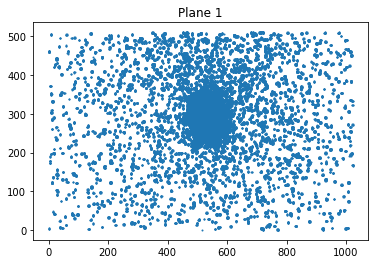

In [19]:
plt.title("Plane 1")
plt.scatter(plane_zero['id_x'],plane_zero['id_y'], s=1)

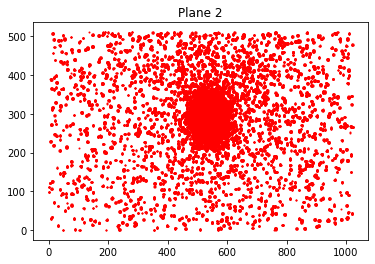

In [20]:
plt.title("Plane 2")
plt.scatter(plane_one['id_x'],plane_one['id_y'],color='red',s=1)

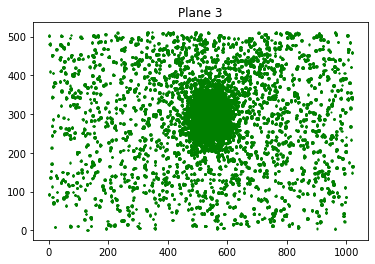

In [21]:
plt.title("Plane 3")
plt.scatter(plane_two['id_x'],plane_two['id_y'],color='green',s=1)

The cluster of all protons that hit per plane look similar

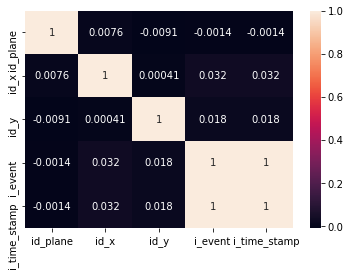

In [22]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

As we can see event id and timestamp have a correlation of 1.
We can use this information later in the process

### Approach 1: KDTree nearest neighbor

First now we split each plane cluster into subclusters of timestamps

In [23]:
list_of_plane_zero_clusters = split_by_time.split_df(plane_zero)
list_of_plane_one_clusters = split_by_time.split_df(plane_one)
list_of_plane_two_clusters = split_by_time.split_df(plane_two)

To see the correlations between we do a heatmap of the correlation matrix


In [24]:
df_centroids_plane_zero = pd.DataFrame(columns=['centroid_x', 'centroid_y', 'event_id'])
df_centroids_plane_one = pd.DataFrame(columns=['centroid_x', 'centroid_y', 'event_id'])
df_centroids_plane_two = pd.DataFrame(columns=['centroid_x', 'centroid_y', 'event_id'])

#for each plane we go through the list of clusters (by timestamp) and calculate the centroid of each one, then put them into a dataframe of x, y coordinate and event_id

for i in list_of_plane_zero_clusters:
        sum_x = i['id_x'].sum(axis=0)
        sum_y = i['id_y'].sum(axis=0)
        length = len(i.index)
        event_id = i.iloc[0, 3]
        centroid_x = sum_x / length
        centroid_y = sum_y / length
        df_centroids_plane_zero = df_centroids_plane_zero.append({'centroid_x': centroid_x, 'centroid_y': centroid_y, 'event_id': event_id},
                                           ignore_index=True)

for i in list_of_plane_one_clusters:
        sum_x = i['id_x'].sum(axis=0)
        sum_y = i['id_y'].sum(axis=0)
        length = len(i.index)
        event_id = i.iloc[0, 3]
        centroid_x = sum_x / length
        centroid_y = sum_y / length
        df_centroids_plane_one = df_centroids_plane_one.append({'centroid_x': centroid_x, 'centroid_y': centroid_y, 'event_id': event_id},
                                           ignore_index=True)

for i in list_of_plane_two_clusters:
        sum_x = i['id_x'].sum(axis=0)
        sum_y = i['id_y'].sum(axis=0)
        length = len(i.index)
        event_id = i.iloc[0, 3]
        centroid_x = sum_x / length
        centroid_y = sum_y / length
        df_centroids_plane_two = df_centroids_plane_two.append({'centroid_x': centroid_x, 'centroid_y': centroid_y, 'event_id': event_id},
                                           ignore_index=True)

print(df_centroids_plane_zero)
print(df_centroids_plane_one)
print(df_centroids_plane_two)

      centroid_x  centroid_y  event_id
0     556.200000  251.500000      55.0
1     552.800000  320.500000      56.0
2     552.777778  320.444444      57.0
3     561.875000  325.875000      85.0
4     587.000000  245.500000      93.0
...          ...         ...       ...
8228  643.500000  381.500000  240257.0
8229  643.500000  381.500000  240258.0
8230  499.000000  483.285714  240276.0
8231  499.000000  483.333333  240277.0
8232  472.181818  271.181818  240306.0

[8233 rows x 3 columns]
      centroid_x  centroid_y  event_id
0     494.000000  312.000000      32.0
1     493.750000  311.833333      33.0
2     958.000000  509.500000      61.0
3     958.000000  509.500000      62.0
4     581.714286  293.500000      70.0
...          ...         ...       ...
8217  460.615385  274.384615  240206.0
8218  581.000000  327.500000  240215.0
8219  581.000000  327.500000  240216.0
8220  637.333333  214.250000  240247.0
8221  637.333333  214.250000  240248.0

[8222 rows x 3 columns]
      centroid

We calculated each centroid of the subcluster of each plane. Now we will try to find the nearest neighbor from centroid of plane x on plane x+1. Then we will try to match the event ids of the neighbors.


In [25]:
df_matching_event_ids = pd.DataFrame(columns=['event_id_plane_0', 'event_id_plane_1', 'event_id_plane_2']) #final dataframe of matching event_ids



for i in range(len(df_centroids_plane_zero)):
    pt = [df_centroids_plane_zero.iloc[i][0],df_centroids_plane_zero.iloc[i][1]] #create a point of each row in the centroid dataframe
    event_id_plane_0 = df_centroids_plane_zero.iloc[i][2] #get the event id of this specific row


    centroid_plane1_slice = df_centroids_plane_one[(df_centroids_plane_one['event_id'] >  int(event_id_plane_0)) & (df_centroids_plane_one['event_id'] < (int(event_id_plane_0) + 150))]
    plane_1_centroid_array = centroid_plane1_slice.drop(['event_id'], axis=1) #drop the event_id column, take a slice of the centroids array of plane 1 where event id <= event id plane 0 + 150
    plane_1_centroid_array = plane_1_centroid_array.to_numpy() #convert it to numpy array

    try: #try to find the nearest neighbor of our point in the sliced numpy array of centroids
        nearest_point = plane_1_centroid_array[spatial.KDTree(plane_1_centroid_array).query(pt)[1]]
    except: #if we couldnt find one in the range of next 150 event ids continue with the next centroid of plane 0
        continue

    #do the same as before with the next plane
    row = df_centroids_plane_one.loc[(df_centroids_plane_one['centroid_x'] == nearest_point[0]) & (df_centroids_plane_one['centroid_y'] == nearest_point[1])]
    event_id_plane_1 = row.iloc[0][2]
    df_centroids_plane_one = df_centroids_plane_one[df_centroids_plane_one.event_id != event_id_plane_1]#set the next point to find in the plane two sliced array


    centroid_plane2_slice = df_centroids_plane_two[(df_centroids_plane_two['event_id'] >  int(event_id_plane_1)) & (df_centroids_plane_two['event_id'] < (int(event_id_plane_1) + 150))]
    plane_2_centroid_array = centroid_plane2_slice.drop(['event_id'], axis=1)
    plane_2_centroid_array = plane_2_centroid_array.to_numpy()

    try:
        nearest_point2 = plane_2_centroid_array[spatial.KDTree(plane_2_centroid_array).query(nearest_point)[1]]
    except:
        continue
    row2 = df_centroids_plane_two.loc[(df_centroids_plane_two['centroid_x'] == nearest_point2[0]) & (df_centroids_plane_two['centroid_y'] == nearest_point2[1])]
    event_id_plane_2 = row2.iloc[0][2]
    df_centroids_plane_two = df_centroids_plane_two[df_centroids_plane_two.event_id != event_id_plane_2]
    df_matching_event_ids = df_matching_event_ids.append({'event_id_plane_0': event_id_plane_0, 'event_id_plane_1': event_id_plane_1, 'event_id_plane_2': event_id_plane_2},
                                           ignore_index=True) #save the matching event ids into the dataframe


print(df_matching_event_ids)

      event_id_plane_0  event_id_plane_1  event_id_plane_2
0                 55.0              73.0             143.0
1                 56.0             156.0             260.0
2                 57.0             155.0             240.0
3                 85.0             148.0             241.0
4                 93.0             239.0             309.0
...                ...               ...               ...
4661          239963.0          240093.0          240116.0
4662          239964.0          240094.0          240222.0
4663          240003.0          240091.0          240106.0
4664          240015.0          240092.0          240215.0
4665          240017.0          240157.0          240231.0

[4666 rows x 3 columns]


Now we have a dataframe of event ids of each plane that match the nearest neighbor of every subcluster


### Approach 2: DBScan

In [26]:
#Importing necessary packages to calculate the DBSCAN
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [27]:

#started with fist(primary plane) the data to observe   primary clustering
X = pd.read_csv('data/raw/pctdata.csv')
X=X[X['id_plane']==0]
# Dropping the id_plane column from the data
X = X.drop('id_plane', axis=1)

# Handling the missing values
X.fillna(method='ffill', inplace=True)

print(X.head())

X = X.drop_duplicates(subset = "i_event", keep = "last")
print(X.head())

     id_x   id_y  i_event  i_time_stamp
60  555.0  251.0       55         39998
61  555.0  252.0       55         39998
62  556.0  250.0       55         39998
63  557.0  250.0       55         39998
64  557.0  251.0       55         39998
      id_x   id_y  i_event  i_time_stamp
69   556.0  253.0       55         39998
87   554.0  321.0       56         40798
113  554.0  321.0       57         41598
161  562.0  327.0       85         63198
169  588.0  246.0       93         69598


In [28]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [29]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps=1.41, min_samples=1).fit(X_normalized)
labels = db_default.labels_

In [30]:
# Output
print(labels)
print(len(set(labels)))

[0 0 0 ... 0 0 0]
1


In [31]:
# importing and applyig t-SNE and fitting it
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X_normalized)

In [32]:
# Assigning crossponding columns
X["id_x"] = X_embedded[:, 0]
X["id_y"] = X_embedded[:, 1]

In [33]:
# importing plotly
import plotly.express as px

In [34]:
fig = px.scatter(X, x="id_x", y="id_y", size_max=60)
fig.update_layout(
    height=800)
fig.show()

In [35]:
#started with second plane the data to observe  second plane clustering
X = pd.read_csv('data/raw/pctdata.csv')
X=X[X['id_plane']==1]
# Dropping the id_plane column from the data
X = X.drop('id_plane', axis=1)

# Handling the missing values
X.fillna(method='ffill', inplace=True)

print(X.head())

X = X.drop_duplicates(subset = "i_event", keep = "last")
print(X.head())

    id_x   id_y  i_event  i_time_stamp
0  492.0  310.0       32         21600
1  493.0  310.0       32         21600
2  493.0  311.0       32         21600
3  492.0  311.0       32         21600
4  493.0  312.0       32         21600
      id_x   id_y  i_event  i_time_stamp
15   496.0  313.0       32         21600
27   496.0  312.0       33         22400
126  958.0  510.0       61         44798
128  958.0  510.0       62         45598
142  582.0  295.0       70         51998


In [36]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [37]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps=1.41, min_samples=1).fit(X_normalized)

labels = db_default.labels_

In [38]:
# Output
print(labels)
print(len(set(labels)))

[0 0 0 ... 0 0 0]
1


In [39]:
# importing and applyig t-SNE and fitting it
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X_normalized)

In [40]:
# Assigning crossponding columns
X["id_x"] = X_embedded[:, 0]
X["id_y"] = X_embedded[:, 1]

In [41]:
# importing plotly
import plotly.express as px

In [42]:
fig = px.scatter(X, x="id_x", y="id_y", size_max=60)
fig.update_layout(
    height=800)
fig.show()


In [43]:

# First started with last plane  to observe  third plane clustering
X = pd.read_csv('data/raw/pctdata.csv')
X=X[X['id_plane']==2]
# Dropping the id_plane column from the data
X = X.drop('id_plane', axis=1)

# Handling the missing values
X.fillna(method='ffill', inplace=True)

print(X.head())

X = X.drop_duplicates(subset = "i_event", keep = "last")
print(X.head())

     id_x   id_y  i_event  i_time_stamp
28  558.0  422.0       47         33598
29  559.0  422.0       47         33598
30  559.0  423.0       47         33598
31  558.0  423.0       47         33598
32  558.0  424.0       47         33598
      id_x   id_y  i_event  i_time_stamp
38   560.0  424.0       47         33598
50   560.0  425.0       48         34398
59   536.0  293.0       54         39198
77   536.0  293.0       55         39998
104  870.0   32.0       56         40798


In [44]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [45]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps=1.41, min_samples=1).fit(X_normalized)

labels = db_default.labels_

In [46]:
# Output
print(labels)
print(len(set(labels)))

[0 0 0 ... 0 0 0]
1


In [47]:
# importing and applyig t-SNE and fitting it
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X_normalized)

In [48]:
# Assigning crossponding columns
X["id_x"] = X_embedded[:, 0]
X["id_y"] = X_embedded[:, 1]

In [49]:
# importing plotly
import plotly.express as px

In [50]:
fig = px.scatter(X, x="id_x", y="id_y", size_max=60)
fig.update_layout(
    height=800)
fig.show()

In [51]:
# First started with all the data to observe  the combined cluster
X = pd.read_csv('data/raw/pctdata.csv')
# Dropping the id_plane column from the data
X = X.drop('id_plane', axis=1)

# Handling the missing values
X.fillna(method='ffill', inplace=True)

print(X.head())
#Most rows are reduced by unique i_event because of inefficiency  and long processing time
X = X.drop_duplicates(subset = "i_event", keep = "last")
print(X.head())

    id_x   id_y  i_event  i_time_stamp
0  492.0  310.0       32         21600
1  493.0  310.0       32         21600
2  493.0  311.0       32         21600
3  492.0  311.0       32         21600
4  493.0  312.0       32         21600
     id_x   id_y  i_event  i_time_stamp
15  496.0  313.0       32         21600
27  496.0  312.0       33         22400
38  560.0  424.0       47         33598
50  560.0  425.0       48         34398
59  536.0  293.0       54         39198


In [52]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [53]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps=1.41, min_samples=1).fit(X_normalized)

labels = db_default.labels_

In [54]:
# Output
print(labels)
print(len(set(labels)))

[0 0 0 ... 0 0 0]
1


In [55]:
# importing and applyig t-SNE and fitting it
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X_normalized)

In [56]:
# Assigning crossponding columns
X["id_x"] = X_embedded[:, 0]
X["id_y"] = X_embedded[:, 1]

In [57]:
# importing plotly
import plotly.express as px

In [58]:
fig = px.scatter(X, x="id_x", y="id_y", size_max=60)
fig.update_layout(
    height=800)
fig.show()


#All three clustering on each individual plane seems to  have similar pattern.

### Conclusion
Both of our approaches returned some results, but both of us used an unsupervised method. So in the future we could try some supervised approaches and get even better results.